## MACHINE LEARNING - Linear Regression
#### Problem Statement:

Airline companies are following the dynamic pricing model. They have fixed number of seats in their plane. They are following the dynamic pricing strategy for selling seats to increase the revenue. The pricing will change based on the demand. The demand is dependent on many factors such as holiday, peak time, short/long route, number of stops, economy class etc,. Airlines have to model the demand, so that they can sell all the seats with more profit. Modelling the demand is critical because poor modelling may leave more seat empty or lead to less revenue.

***Develop a machine learning model to predict the airline price using the features provided in the dataset. Prior to build the ML model EDA need to carried out to understand and clean the data.***         


#### Read the dataset and print the following 
 
     *Shape of the data
     * Number of numerical and categorical variable
     * Descriptive stats of numerical data
     * Descriptive stats of categorical data

In [15]:
#Required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")


In [17]:
df = pd.read_excel(r'C:\Users\krames25\Backup\Training\Education\DS\D.S Notes\Machine Learning\Assignments\31-JAN-2022\TRAIN.xlsx')
df.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [3]:
print('shape', df.shape)

shape (9000, 11)


In [18]:
num_data = df.select_dtypes(include = np.number)
num_data.head(2)

,Price
0,3897
1,7662


In [19]:
cat_data = df.select_dtypes(exclude =np.number)
cat_data.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info


In [20]:
df.isnull().sum()

Airline              0
Date                 0
Departure Station    0
Arrival Station      0
Route Map            0
Departure Time       0
Arrival Time         0
Journey Time         0
Stops                0
Extra Info           0
Price                0
dtype: int64

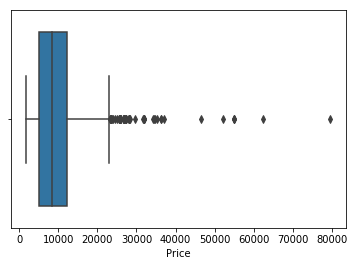

In [21]:
sb.boxplot(df['Price'])

In [22]:
q3 = df['Price'].quantile(0.75)
q1 = df['Price'].quantile(0.25)
iqr = q3 - q1
ub =q3 + (1.5*iqr)
lb = q1 - (1.5*iqr)
df1 = df[~((df['Price']>ub) | (df['Price']<lb)) ]

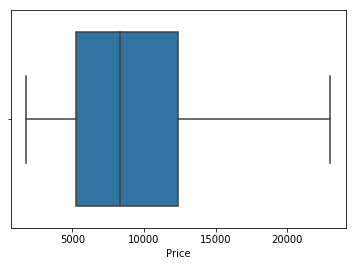

In [23]:
sb.boxplot(df1['Price'])

In [19]:
df1.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [24]:
out = df1['Price']
inp= df1.drop('Price',axis=1)
inp.head(2)

,Airline,Date,Departure Station,Arrival Station,Route Map,Departure Time,Arrival Time,Journey Time,Stops,Extra Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info


In [25]:
import statsmodels.api as sm

In [26]:
inpc= sm.add_constant(inp)
#mod = sm.OLS(Out,inpc)
#inpc.head(2)
mod=sm.OLS(out,inpc)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

#### Perform Bivariate analysis to understand the data  

*Understand the relation between price and Airlines using appropriate technique/graph

*Understand the relation between price and Departure station using appropriate technique/graph
 


#### Plot the distribution of Price and comment about its skewness 

In [16]:
df['Price'].skew()

1.8027147176394864

#### create a month, day and day_name columns in the dataset using the date column
#### Round of the departure time and arrival time hours. 
  Example: convert 22:20  to 22 and 5:50 to 6


#### 2 (v)
* Clean and Replace the Journey time column value with journey time in minutes. Example: convert 2h 50m to 170
* Encode the stops with the levels 0,1,2,3


####  Create a new column with title “source_destination” which consist of both departure and final arrival station information in one cell.

 Example: 
 
 Convert DEL --> BLR  as DEL,BLR
 
 Convert CCI --> IXR --> BBI --> BLR as CCI,BLR
 



#### Apply appropriate encoding on required categorical columns

#### Build the Linear Regression model using OLS statmodels package and print the summary report.

#### Check the assumptions of Linear Regression model. Try to satify the assumptions to the extent you can

#### Build the Linear regression using sklearn model and compute Rsquare, RMSE and model coefficients. 

#### Compare the performance of  Backward Elimination and Forward Selection feature engineering algorithms in-terms of Rsquare and MSE.

#### Build the RIDGE and LASSO models and comment about these models variance error for different values of penalty factor

#### Create some new feature using the domain knowledge with respect to this dataset and improve the model performance. Also, make use of the data file ‘distance.csv’ to improve the model performance. ‘distance.csv’ file have the information about the distance between source and destination station in kms. 